# 2. Models of Computation, Document Distance

- An **algorithm** is a mathematical abstraction of a computer program
- A model of computation specifies
    - what operations you can do in an algorithm
    - how much each operation costs (time)
- **Classic models of computation**
    - **Random Access Machine (theoretical)**
        - Uses Random Access Memory
            - organized by "words"
            - word is w bits
            - for our purposes, words are inputs that you can run computations on 
        - Allowed operations in O(1)
            - load constant number of words
            - do constant number of computations
            - store constant number of words
        -  Has constant term of registers 
    - **Pointer Machine (theoretical)**
        - Dynamically allocated objects
        - An object has constant number of fields
            - field = word OR pointer
            - pointer = something that points to another object or is null/None
        - Doubly linked lists can be represented in the pointer machine model
    - **Python Model**
        - Operations and their costs
            - L.append(x) --> O(1)
            - L = L1 + L2 --> O(1 + |L1| + |L2|)
            - L1.extend(L2) --> O(1 + |L2|)
            - L2 = L1[i:j] --> O(j - i + 1)
            - b = x in L --> O(index of x) or at worst O(len(L))
            - len(L) --> O(1)
                - lists in python are implemented with a counter
            - L.sort() --> O(|L|log(|L|))
            - dict: D[key] = val --> O(1)
            - long:
                - x + y --> O(|x| + |y|)
                - x * y --> O(|x| + |y|)^(log(3)))
            - heap queue
                - data structure to be covered in later lectures        
- **Document Distance Problem:**
    - Problem: given 2 document D1 and D2, find the distance between them
        - distance = how identical are 2 documents
        - document = sequence of words
        - word = string of alphanumeric characters
    - Idea: look at shared words between documents
    - Can think of document as a vector
        - plot different words of different axes, a document is a vector of the frequency of those words
        - D[word] = # of occurences of word w in a document D
        - 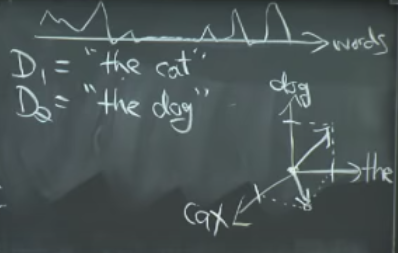
        - A good measure of document distance is the angle between the two document vectors:
            - 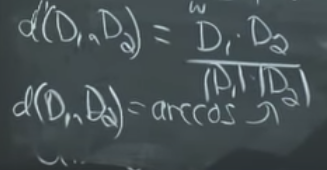
    - **Basic Structure of Document Distance Algorithm**
        - split a document into words
        - compute word frequencies (the document vectors)
        - compute the dot product between the document vectors
    - Note:
        - 8 different algorithms provided, small changes lead to dramatic improvement in algorithm run times
        - for fun, the slowest and fastest algorithms are provided below.

In [ ]:
## slowest algorithm --> 228.1 seconds to find distance between 1 megabyte files

#!/usr/bin/python
# docdist1.py - initial version of document distance
#
# Original version by Ronald L. Rivest on February 14, 2007
# Revision by Erik D. Demaine on September 12, 2011
#
# Usage:
#    docdist1.py filename1 filename2
#     
# This program computes the "distance" between two text files
# as the angle between their word frequency vectors (in radians).
#
# For each input file, a word-frequency vector is computed as follows:
#    (1) the specified file is read in
#    (2) it is converted into a list of alphanumeric "words"
#        Here a "word" is a sequence of consecutive alphanumeric
#        characters.  Non-alphanumeric characters are treated as blanks.
#        Case is not significant.
#    (3) for each word, its frequency of occurrence is determined
#    (4) the word/frequency lists are sorted into order alphabetically
#
# The "distance" between two vectors is the angle between them.
# If x = (x1, x2, ..., xn) is the first vector (xi = freq of word i)
# and y = (y1, y2, ..., yn) is the second vector,
# then the angle between them is defined as:
#    d(x,y) = arccos(inner_product(x,y) / (norm(x)*norm(y)))
# where:
#    inner_product(x,y) = x1*y1 + x2*y2 + ... xn*yn
#    norm(x) = sqrt(inner_product(x,x))

import math
    # math.acos(x) is the arccosine of x.
    # math.sqrt(x) is the square root of x.

import sys

##################################
# Operation 1: read a text file ##
##################################
def read_file(filename):
    """ 
    Read the text file with the given filename;
    return a list of the lines of text in the file.
    """
    try:
        f = open(filename, 'r')
        return f.readlines()
    except IOError:
        print "Error opening or reading input file: ",filename
        sys.exit()

#################################################
# Operation 2: split the text lines into words ##
#################################################
def get_words_from_line_list(L):
    """
    Parse the given list L of text lines into words.
    Return list of all words found.
    """

    word_list = []
    for line in L:
        words_in_line = get_words_from_string(line)
        word_list = word_list + words_in_line
    return word_list

def get_words_from_string(line):
    """
    Return a list of the words in the given input string,
    converting each word to lower-case.

    Input:  line (a string)
    Output: a list of strings 
              (each string is a sequence of alphanumeric characters)
    """
    word_list = []          # accumulates words in line
    character_list = []     # accumulates characters in word
    for c in line:
        if c.isalnum():
            character_list.append(c)
        elif len(character_list)>0: # if we're at a space?
            word = "".join(character_list)
            word = word.lower()
            word_list.append(word)
            character_list = []
    if len(character_list)>0: # if the line ends, make whatever was in the character list a new word
        word = "".join(character_list)
        word = word.lower()
        word_list.append(word)
    return word_list

##############################################
# Operation 3: count frequency of each word ##
##############################################
def count_frequency(word_list):
    """
    Return a list giving pairs of form: (word,frequency)
    """
    L = []
    for new_word in word_list:
        for entry in L:
            if new_word == entry[0]:
                entry[1] = entry[1] + 1 # increment the frequency counter if the same word is found
                break
        else:
            L.append([new_word,1])
    return L

###############################################################
# Operation 4: sort words into alphabetic order             ###
###############################################################
def insertion_sort(A):
    """
    Sort list A into order, in place.

    From Cormen/Leiserson/Rivest/Stein,
    Introduction to Algorithms (second edition), page 17,
    modified to adjust for fact that Python arrays use 
    0-indexing.
    """
    for j in range(len(A)):
        key = A[j]
        # insert A[j] into sorted sequence A[0..j-1]
        i = j-1
        while i>-1 and A[i]>key:
            A[i+1] = A[i]
            i = i-1
        A[i+1] = key
    return A
    
#############################################
## compute word frequencies for input file ##
#############################################
def word_frequencies_for_file(filename):
    """
    Return alphabetically sorted list of (word,frequency) pairs 
    for the given file.
    """

    line_list = read_file(filename)
    word_list = get_words_from_line_list(line_list)
    freq_mapping = count_frequency(word_list)
    insertion_sort(freq_mapping)

    print "File",filename,":",
    print len(line_list),"lines,",
    print len(word_list),"words,",
    print len(freq_mapping),"distinct words"

    return freq_mapping

def inner_product(L1,L2):
    """
    Inner product between two vectors, where vectors
    are represented as lists of (word,freq) pairs.

    Example: inner_product([["and",3],["of",2],["the",5]], --> end of first list
                           [["and",4],["in",1],["of",1],["this",2]]) = 14.0 
    """
    sum = 0.0
    for word1, count1 in L1:
        for word2, count2 in L2:
            if word1 == word2:
                sum += count1 * count2
    return sum

def vector_angle(L1,L2):
    """
    The input is a list of (word,freq) pairs, sorted alphabetically.

    Return the angle between these two vectors.
    """
    numerator = inner_product(L1,L2)
    denominator = math.sqrt(inner_product(L1,L1)*inner_product(L2,L2))
    return math.acos(numerator/denominator)

def main():
    if len(sys.argv) != 3:
        print "Usage: docdist1.py filename_1 filename_2"
    else:
        filename_1 = sys.argv[1]
        filename_2 = sys.argv[2]
        sorted_word_list_1 = word_frequencies_for_file(filename_1)
        sorted_word_list_2 = word_frequencies_for_file(filename_2)
        distance = vector_angle(sorted_word_list_1,sorted_word_list_2)
        print "The distance between the documents is: %0.6f (radians)"%distance

if __name__ == "__main__":
    import profile
    profile.run("main()")

In [ ]:
## fastest algorithm --> 0.2 seconds to find distance between same 2 files

#!/usr/bin/python
# docdist8.py - treat whole file as a single "line"
#
# Original version by Erik D. Demaine on January 31, 2011,
# based on code by Ronald L. Rivest (see docdist[1-7].py).
#
# Usage:
#    docdist8.py filename1 filename2
#     
# This program computes the "distance" between two text files
# as the angle between their word frequency vectors (in radians).
#
# For each input file, a word-frequency vector is computed as follows:
#    (1) the specified file is read in
#    (2) it is converted into a list of alphanumeric "words"
#        Here a "word" is a sequence of consecutive alphanumeric
#        characters.  Non-alphanumeric characters are treated as blanks.
#        Case is not significant.
#    (3) for each word, its frequency of occurrence is determined
#    (4) the word/frequency lists are sorted into order alphabetically
#
# The "distance" between two vectors is the angle between them.
# If x = (x1, x2, ..., xn) is the first vector (xi = freq of word i)
# and y = (y1, y2, ..., yn) is the second vector,
# then the angle between them is defined as:
#    d(x,y) = arccos(inner_product(x,y) / (norm(x)*norm(y)))
# where:
#    inner_product(x,y) = x1*y1 + x2*y2 + ... xn*yn
#    norm(x) = sqrt(inner_product(x,x))

import math
    # math.acos(x) is the arccosine of x.
    # math.sqrt(x) is the square root of x.

import string

import sys

##################################
# Operation 1: read a text file ##
##################################
def read_file(filename):
    """ 
    Read the text file with the given filename;
    return a list of the lines of text in the file.
    """
    try:
        f = open(filename, 'r')
        return f.read()
    except IOError:
        print "Error opening or reading input file: ",filename
        sys.exit()

#################################################
# Operation 2: split the text lines into words ##
#################################################

# global variables needed for fast parsing
# translation table maps upper case to lower case and punctuation to spaces
translation_table = string.maketrans(string.punctuation+string.uppercase,
                                     " "*len(string.punctuation)+string.lowercase)

def get_words_from_line_list(text):
    """
    Parse the given text into words.
    Return list of all words found.
    """
    text = text.translate(translation_table)
    word_list = text.split()
    return word_list

##############################################
# Operation 3: count frequency of each word ##
##############################################
def count_frequency(word_list):
    """
    Return a dictionary mapping words to frequency.
    """
    D = {}
    for new_word in word_list:
        if new_word in D:
            D[new_word] = D[new_word]+1
        else:
            D[new_word] = 1
    return D

#############################################
## compute word frequencies for input file ##
#############################################
def word_frequencies_for_file(filename):
    """
    Return dictionary of (word,frequency) pairs for the given file.
    """

    line_list = read_file(filename)
    word_list = get_words_from_line_list(line_list)
    freq_mapping = count_frequency(word_list)

    print "File",filename,":",
    print len(line_list),"lines,",
    print len(word_list),"words,",
    print len(freq_mapping),"distinct words"

    return freq_mapping

def inner_product(D1,D2):
    """
    Inner product between two vectors, where vectors
    are represented as dictionaries of (word,freq) pairs.

    Example: inner_product({"and":3,"of":2,"the":5},
                           {"and":4,"in":1,"of":1,"this":2}) = 14.0 
    """
    sum = 0.0
    for key in D1:
        if key in D2:
            sum += D1[key] * D2[key]
    return sum

def vector_angle(D1,D2):
    """
    The input is a list of (word,freq) pairs, sorted alphabetically.

    Return the angle between these two vectors.
    """
    numerator = inner_product(D1,D2)
    denominator = math.sqrt(inner_product(D1,D1)*inner_product(D2,D2))
    return math.acos(numerator/denominator)

def main():
    if len(sys.argv) != 3:
        print "Usage: docdist8.py filename_1 filename_2"
    else:
        filename_1 = sys.argv[1]
        filename_2 = sys.argv[2]
        sorted_word_list_1 = word_frequencies_for_file(filename_1)
        sorted_word_list_2 = word_frequencies_for_file(filename_2)
        distance = vector_angle(sorted_word_list_1,sorted_word_list_2)
        print "The distance between the documents is: %0.6f (radians)"%distance

if __name__ == "__main__":
    import profile
    profile.run("main()")